<a href="https://colab.research.google.com/github/anilpadala/datasciencecoursera/blob/master/Build_a_Machine_Learning_Model_to_a_Practical_Use_Case_From%C2%A0Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use case:  Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?**

---



First of all, we need to understand the domain knowledge and where the environment that problem lies.

# Background Reserach

**What is humidity?** - Humidity is a measure of the amount of water vapor in the air. Humidity depends on the temperature and pressure of the system of interest. 

**What is temparature?** - Temperature is a physical quantity that expresses hot and cold. Temperature Depends on Particle Movement!

**Wind Bearing-**
The direction where the wind is came

**Difference between Temperature and Apparent Temperature:** 

`Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed.`

# Dataset Loading Process

gdown command will download the csv file into colab machine directly

In [ ]:
import os.path

if os.path.isfile('weatherHistory.csv'):
    print ("File exist")
else:
    !gdown --id 1oo2slx2zSFXRq7vImmIlqRd47_ELIsnF

File exist


Import Statements

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

Load The Dataset


In [ ]:
weatherDataframe = pd.read_csv('weatherHistory.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
weatherDataframe.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


View the first 5 rows of the dataset


In [ ]:
weatherDataframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# (a). **Preprocess the dataset as specified in the data mining process:**

First of all we need to remove Columns That Contain a Single Value (Unique value columns).


In [ ]:
# summarize the number of unique values in each column
print(weatherDataframe.nunique())

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


You can see loud cover feature contain only one value. So we can remove that column. Also you can see Formatted date is giving unique value count as near to the count of data rows. So we should remove that one as well.

To help highlight columns of this type, you can calculate the number of unique values for each variable as a percentage of the total number of rows in the dataset.

In [ ]:
from numpy import unique

data = weatherDataframe.to_numpy().astype(str)

# summarize the number of unique values in each column
for i in range(data.shape[1]):
	num = len(unique(data[:, i]))
	percentage = float(num) / data.shape[0] * 100
	print('%s, %d, %.1f%%' % (weatherDataframe.columns[i], num, percentage))

Formatted Date, 96429, 100.0%
Summary, 27, 0.0%
Precip Type, 3, 0.0%
Temperature (C), 7574, 7.9%
Apparent Temperature (C), 8984, 9.3%
Humidity, 90, 0.1%
Wind Speed (km/h), 2484, 2.6%
Wind Bearing (degrees), 360, 0.4%
Visibility (km), 949, 1.0%
Loud Cover, 1, 0.0%
Pressure (millibars), 4979, 5.2%
Daily Summary, 214, 0.2%


As we can see Formatted Date column taking 100% number of unique value compared with datapoints. So we sould drop that column as well.Also by looking at the dataset we can conclude that Daily summary and Summary columns have a great similarity. (They looking derived attributes) So we can remove one of them. So I'll keep the Summary . So our final dataframe will be as follows

In [ ]:
dropColumns=['Formatted Date','Loud Cover','Daily Summary']
weatherDataframe.drop(dropColumns, inplace=True, axis=1)
weatherDataframe

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


We need to find out duplicate rows and remove them as well.

In [ ]:
weatherDataframe

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [ ]:
# calculate duplicates
dups = weatherDataframe.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(weatherDataframe[dups])
# delete duplicate rows
weatherDataframe.drop_duplicates(inplace=True)

True
                   Summary Precip Type  ...  Visibility (km)  Pressure (millibars)
28410             Overcast        rain  ...           4.0250                  0.00
28607  Breezy and Overcast        rain  ...          16.1000               1005.10
28920        Mostly Cloudy        snow  ...           4.9910               1016.10
29472             Overcast        snow  ...           4.5080               1026.30
29473        Mostly Cloudy        snow  ...           7.9856               1026.74
...                    ...         ...  ...              ...                   ...
64544                Foggy        snow  ...           0.1610               1021.42
64545                Foggy        snow  ...           0.3220               1022.40
64546                Foggy        snow  ...           3.0912               1023.19
64547             Overcast        snow  ...           3.4293               1023.35
64548             Overcast        snow  ...           3.4454               1023.64

In [ ]:
weatherDataframe

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


There is one **important thing** to remember. When we removing rows, this will cause the indexes are to be different. As an example, if you remove row 18 from dataframe, now the indexes will be ..16,17,19,20.. like this. This will ultimately resulting difference between **actual row count (96381)** and the **last index.(96452)** In order to avoid this, we need to **reset indexes**. Then it will correct the order.

In [ ]:
weatherDataframe=weatherDataframe.reset_index(drop=True)

In [ ]:
weatherDataframe

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96376,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96377,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96378,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96379,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


### I). Handle Missing Values and Outliers if any

Checking whether any missing values

In [ ]:
weatherDataframe.isnull().values.any()

True

In [ ]:
#Getting the summary of what are missing value columns
weatherDataframe.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [ ]:
weatherDataframe[weatherDataframe['Precip Type'].isna()]

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
52625,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,1002.40
52627,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,1001.79
52628,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,1001.60
52630,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,1001.92
52631,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,1002.20
...,...,...,...,...,...,...,...,...,...
95512,Mostly Cloudy,NaN,8.322222,7.044444,0.85,8.0339,290.0,0.000,1021.73
95513,Mostly Cloudy,NaN,7.627778,6.183333,0.87,8.2271,293.0,0.000,1021.76
95514,Mostly Cloudy,NaN,7.111111,5.511111,0.89,8.5008,297.0,0.000,1021.81
95515,Partly Cloudy,NaN,6.672222,4.961111,0.90,8.6457,299.0,0.000,1021.83


Checking the probability to drop it or replace with value.

In [ ]:
weatherDataframe['Precip Type'].isna().sum()/(len(weatherDataframe))*100

0.5364127784521846

We can drop these rows because it has very low probability  and it ensures that no bias or variance is added or removed, and ultimately results in a robust and accurate model.

In [ ]:
# make copy to avoid changing original data
new_weatherDf = weatherDataframe.copy()
# removing missing values
new_weatherDf=new_weatherDf.dropna(axis=0)
# We have to reset indexes because our dataframe still having previous indexes after dropping rows
new_weatherDf=new_weatherDf.reset_index(drop=True)

In [ ]:
new_weatherDf.isnull().values.any()

False

Additionaly we can define custom missing value set when loading the dataset. If we want to map a list of values which must be treated as missing values in all columns, we can pass a list of candidates which we want to globally consider as missing values to the na_values parameter. This technique is used when some special characters treated as missing values.

In [ ]:
missing_values = ["n.a.","NA","n/a", "na"]
df = pd.read_csv('weatherHistory.csv', na_values = missing_values)
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

As you can see, we will get the same as previous.



---



Handling Ouitliers - Box Plots

In [ ]:
# Simply you can use this to check 
# new_weatherDf.boxplot(figsize=(16,10));
# But I used the seabon library boxplot function

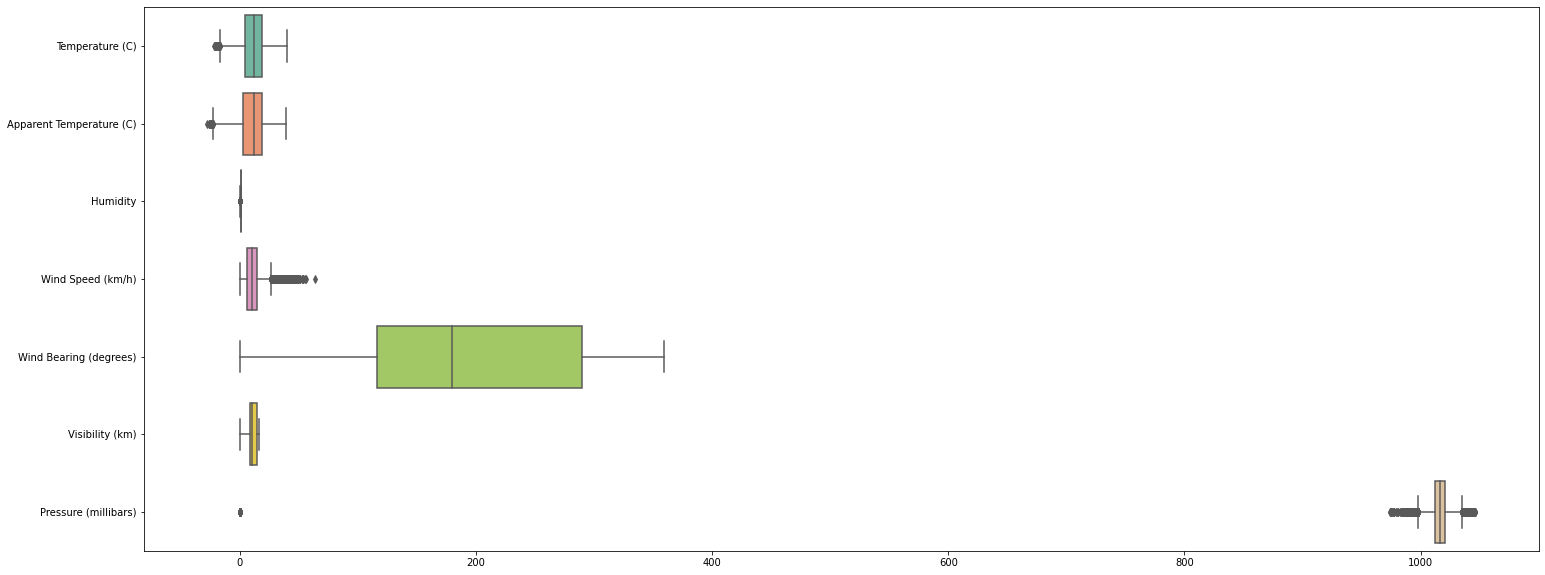

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(data=new_weatherDf, orient="h", palette="Set2",ax=ax );

We cannot clearly see the bloxpots. but form here, we can get a idea what coloumns will be the possible outliers. As you can see, **Pressure** colunm will have a outlier. Let's examine one by one to confirm it exactly.

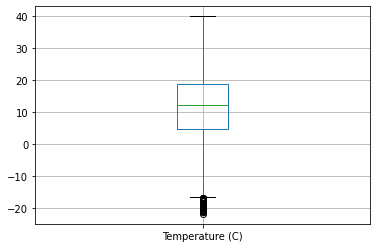

In [ ]:
new_weatherDf.boxplot(column=['Temperature (C)']);

We cannot accept this as having outliers becuase there are large number of datapoints. We can say It is skewed, but not have outliers. 

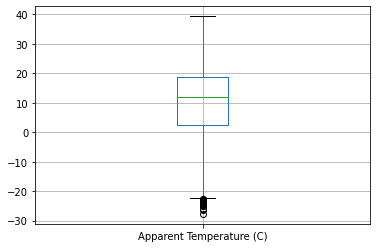

In [ ]:
new_weatherDf.boxplot(column=['Apparent Temperature (C)']);

Same as previous plot, we cannot accept this having outliers


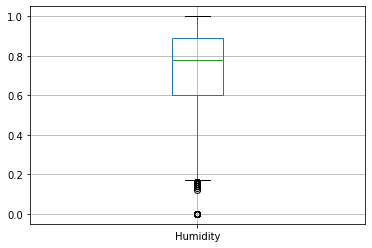

In [ ]:
new_weatherDf.boxplot(column=['Humidity']);

We can see a possible outlier in this boxplot in 0.0 level. Let's remove the outliers.

Before Shape: (95864, 9)
After Shape: (95842, 9)


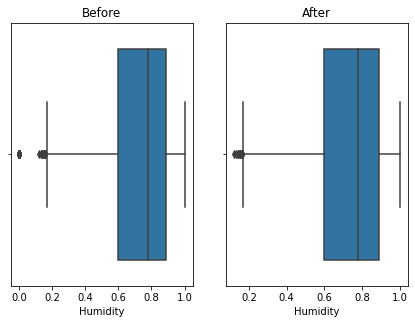

In [ ]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",new_weatherDf.shape)
## Removing humidity bellow 0 outliers
new_weatherDf2 = new_weatherDf[(new_weatherDf['Humidity']>0.0)]
print("After Shape:",new_weatherDf2.shape)

sns.boxplot(new_weatherDf['Humidity'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(new_weatherDf2['Humidity'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
## Replace new dataset with previous and resetting indexes
new_weatherDf=new_weatherDf2;
new_weatherDf=new_weatherDf.reset_index(drop=True)

As you can see, now the outlier has removed successfully.

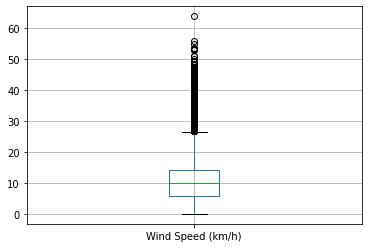

In [ ]:
new_weatherDf.boxplot(column=['Wind Speed (km/h)']);

Here also we can identify a possible outlier above 60kmph. Lets remove that too!

Before Shape: (95842, 9)
After Shape: (95841, 9)


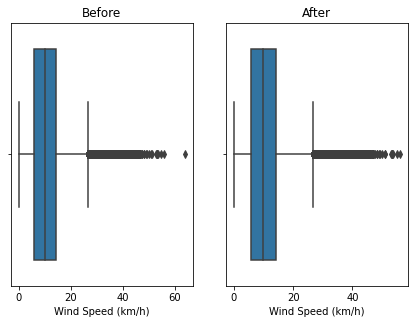

In [ ]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",new_weatherDf.shape)
## Removing Windspeed above 60kmph outlier
new_weatherDf2 = new_weatherDf[ (new_weatherDf['Wind Speed (km/h)']<60)]
print("After Shape:",new_weatherDf2.shape)

sns.boxplot(new_weatherDf['Wind Speed (km/h)'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(new_weatherDf2['Wind Speed (km/h)'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
## Replace new dataset with previous and reset indexes
new_weatherDf=new_weatherDf2;
new_weatherDf=new_weatherDf.reset_index(drop=True)

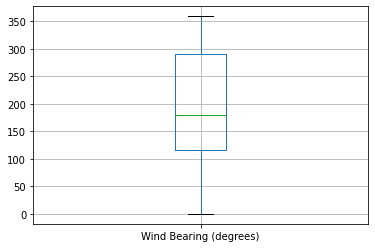

In [ ]:
new_weatherDf.boxplot(column=['Wind Bearing (degrees)']);

No outliers are seen here. All scatterd nicely.

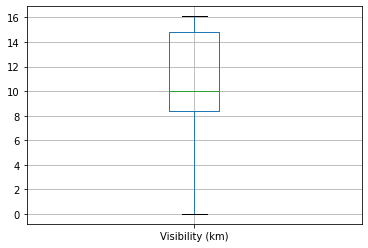

In [ ]:
new_weatherDf.boxplot(column=['Visibility (km)']);

Same as the previous. No outliers.

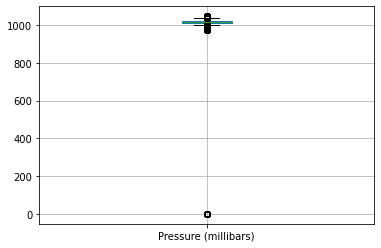

In [ ]:
new_weatherDf.boxplot(column=['Pressure (millibars)']);

Perfect outlier can be seen in the 0 level. It's a pressure and it would not become 0 under normal conditions. This may due to a error in data entry or a problem in the collected equipment. So we should remove them.

Before Shape: (95841, 9)
After Shape: (94556, 9)


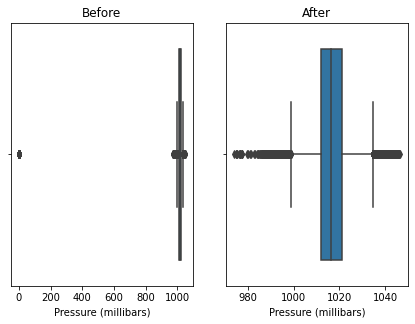

In [ ]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",new_weatherDf.shape)
## Removing Pressure bellow 800 outliers
new_weatherDf2 = new_weatherDf[ (new_weatherDf['Pressure (millibars)']>800)]
print("After Shape:",new_weatherDf2.shape)

sns.boxplot(new_weatherDf['Pressure (millibars)'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(new_weatherDf2['Pressure (millibars)'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
# ## Replace new dataset with previous and reset indexes
new_weatherDf=new_weatherDf2;
new_weatherDf=new_weatherDf.reset_index(drop=True)

This is the Final outcome of removing outliers and missing values.

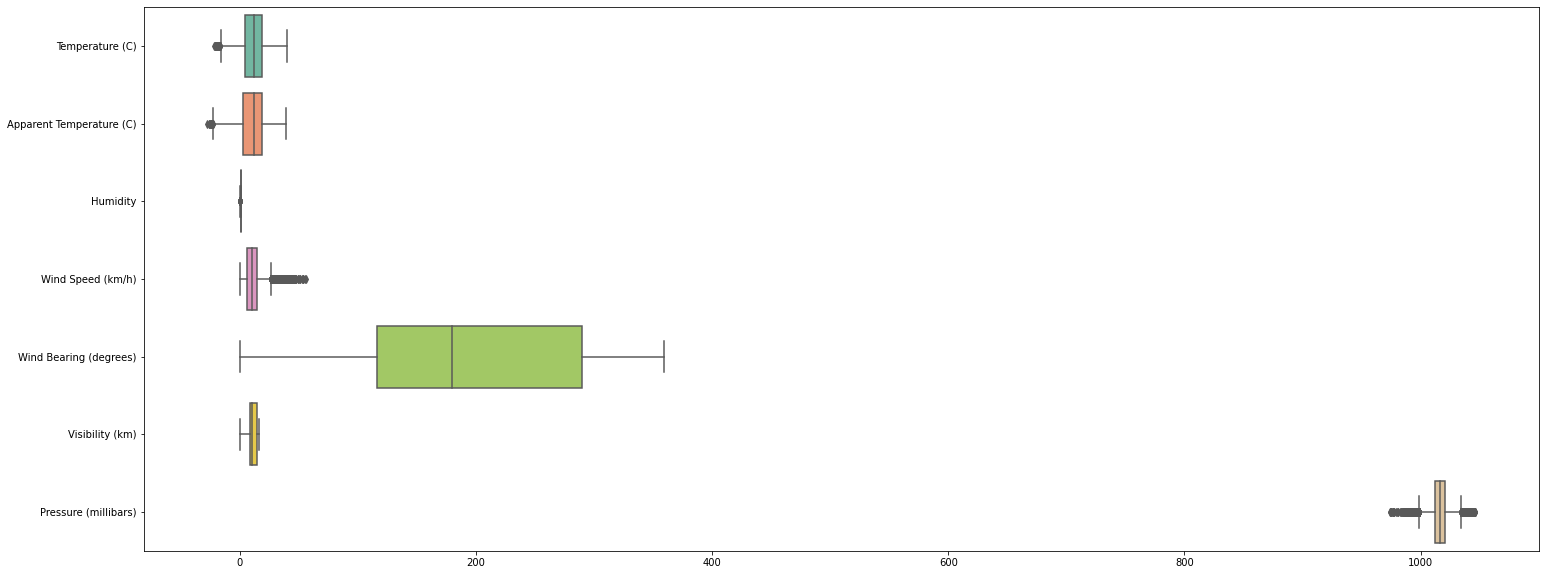

In [ ]:
fig_dims = (25, 10);
fig, ax = plt.subplots(figsize=fig_dims);
sns.boxplot(data=new_weatherDf, orient="h", palette="Set2",ax=ax );

Now all the data preprocessing part is done. Now we have to do the transformations

Before doing that. We need to split the dataset into training and testing. Testing is needed to mesure the accuracy of the model. Why we doing the splitting here is to avoid the -> **Data Leakage Problem**

Testing data points represents real-world data. So the model should not seen that data. If it so, the effect will be over-fitting our training data and having an overly optimistic evaluation of the models performance on unseen data.

In order to avoid that, we should split our dataset into train and test set now  and do the tranforming steps. This will ensure no 'peeking ahead'. Otherwise, information from the test set will "leak" into your training data.

In [ ]:
features_df= new_weatherDf.drop('Apparent Temperature (C)', 1)
features_df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
94551,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
94552,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
94553,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
94554,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [ ]:
target = pd.DataFrame(new_weatherDf['Apparent Temperature (C)'], columns=["Apparent Temperature (C)"])
target

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778
...,...
94551,26.016667
94552,24.583333
94553,22.038889
94554,21.522222


We defined the target as aperent temparature and features as the rest of them. Now we can split them out to 80% - 20% ratio

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size = 0.2, random_state = 101)

Here also we need to reset all the indexes

In [ ]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [ ]:
X_train

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,19.105556,0.86,6.2951,84.0,9.9820,1014.38
1,Overcast,rain,12.150000,0.74,11.2539,348.0,11.2700,1019.79
2,Mostly Cloudy,rain,18.827778,0.90,6.8103,204.0,9.9820,1014.59
3,Overcast,snow,-0.022222,0.82,7.9373,11.0,11.2700,1016.34
4,Clear,rain,26.111111,0.47,17.7100,330.0,9.9820,1015.70
...,...,...,...,...,...,...,...,...
75639,Overcast,rain,2.644444,0.59,23.5060,179.0,10.0464,1010.52
75640,Overcast,rain,16.066667,0.93,8.9677,350.0,4.2987,1009.30
75641,Mostly Cloudy,rain,18.883333,0.47,24.1339,233.0,10.3523,1012.90
75642,Partly Cloudy,rain,12.416667,0.94,5.7638,256.0,9.7888,1020.70


### II). Produce Q-Q Plots and Histograms of the features, and apply the transformations if required. 

Then we should check one by one to apply transformations. 

It's not nessasary to transform the target variable. But reading lot of articleas and experience, I found that a target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable. So It's good to scalling that also

Q-Q Plots and Histograms

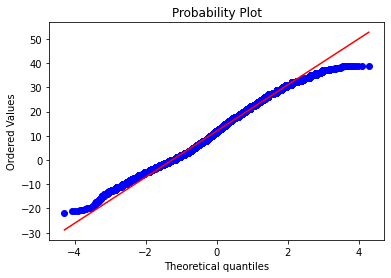

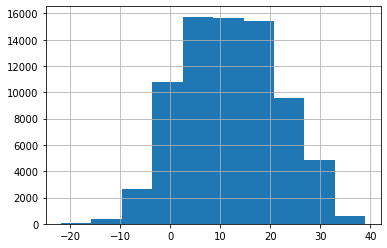

In [ ]:
# Temperature (C). - Training
stats.probplot(X_train["Temperature (C)"], dist="norm", plot=plt);
plt.show();
X_train["Temperature (C)"].hist();

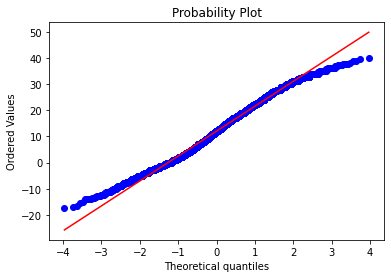

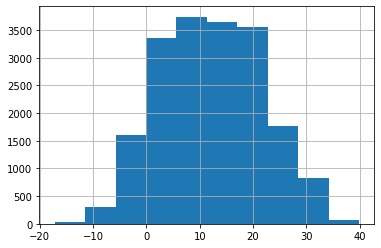

In [ ]:
# Temperature (C). - Testing
stats.probplot(X_test["Temperature (C)"], dist="norm", plot=plt);
plt.show();
X_test["Temperature (C)"].hist();

Temparature shows a normalized graph in both training and testing. Approximately all the data in the red line. So we don't need to modify it.

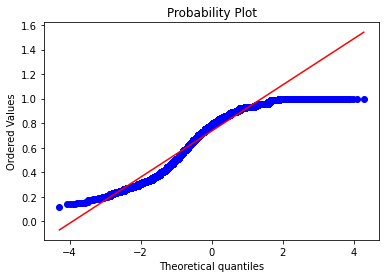

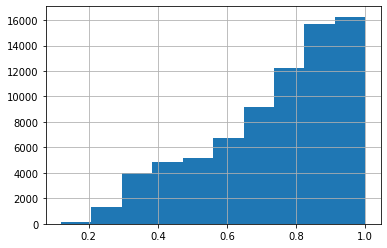

In [ ]:
## Humidity. - X_train
stats.probplot(X_train["Humidity"], dist="norm", plot=plt);
plt.show();
X_train["Humidity"].hist();

Clearly we can see a left skewed distribution. So we need to apply Exponential transformation.

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Humidity']

# create the function transformer object with exponentioal transformation
exp_transformer = FunctionTransformer(lambda x:x**3, validate=True)

# apply the transformation 
data_new = exp_transformer.transform(X_train[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
X_train.Humidity=df_new['Humidity']

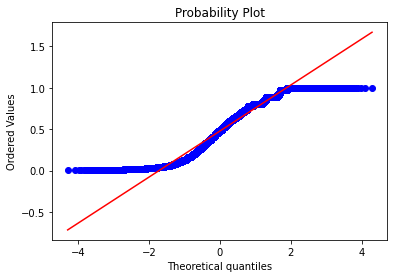

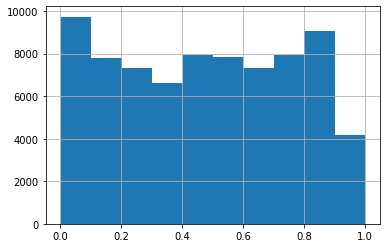

In [ ]:
stats.probplot(X_train["Humidity"], dist="norm", plot=plt);
plt.show();
X_train['Humidity'].hist();

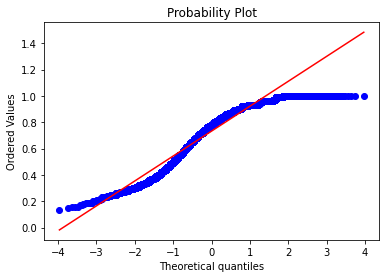

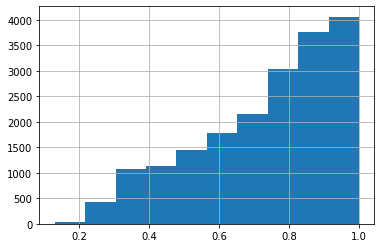

In [ ]:
## Humidity. - X_test
stats.probplot(X_test["Humidity"], dist="norm", plot=plt);
plt.show();
X_test["Humidity"].hist();

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Humidity']

# create the function transformer object with exponentioal transformation
exp_transformer = FunctionTransformer(lambda x:x**3, validate=True)

# apply the transformation 
data_new = exp_transformer.transform(X_test[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
X_test.Humidity=df_new['Humidity']

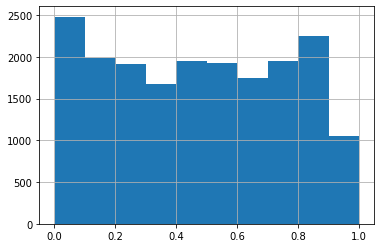

In [ ]:
X_test['Humidity'].hist();

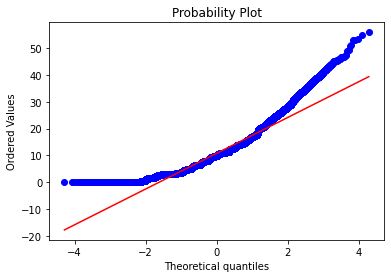

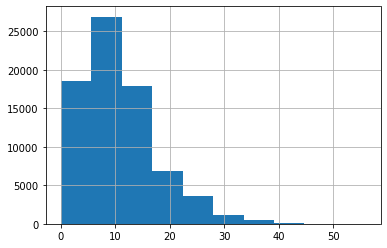

In [ ]:
## Wind Speed (km/h). - X_train
stats.probplot(X_train["Wind Speed (km/h)"], dist="norm", plot=plt);
plt.show();
X_train["Wind Speed (km/h)"].hist();

It is Right skewed. We should apply Logerithem Trassformer to Right Skewed Data

In [ ]:
X_train['Wind Speed (km/h)'].min()

0.0

One Important fact that there contain 0 values. So if we applied logerithem, 0 values will be go into infinite. To avoid that I'm taking the log(x+1) transformation. 
There are more methods to deal with zero values while performing log transformation of variable like replace 0's with nan or taking square root instead of log transformation. But I prefer this way.







In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Wind Speed (km/h)']

# create the function transformer object with logarithm transformation
logarithm_transformer = FunctionTransformer(np.log1p, validate=True)

# apply the transformation 
data_new = logarithm_transformer.transform(X_train[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
X_train['Wind Speed (km/h)']=df_new['Wind Speed (km/h)']

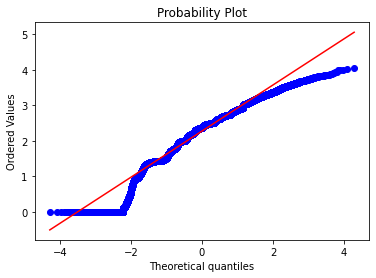

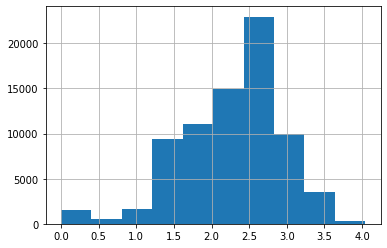

In [ ]:
# After transformation
stats.probplot(X_train["Wind Speed (km/h)"], dist="norm", plot=plt);
plt.show();
X_train["Wind Speed (km/h)"].hist();

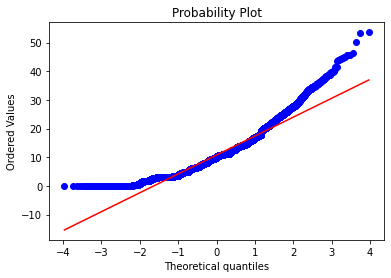

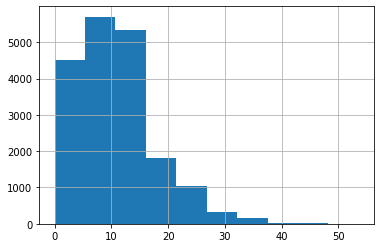

In [ ]:
## Wind Speed (km/h). - X_test
stats.probplot(X_test["Wind Speed (km/h)"], dist="norm", plot=plt);
plt.show();
X_test["Wind Speed (km/h)"].hist();

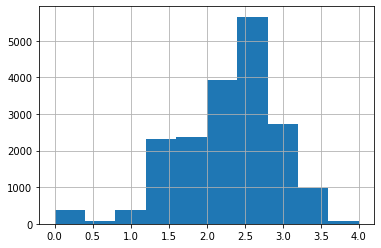

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Wind Speed (km/h)']

# create the function transformer object with logarithm transformation
logarithm_transformer = FunctionTransformer(np.log1p, validate=True)

# apply the transformation 
data_new = logarithm_transformer.transform(X_test[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
X_test['Wind Speed (km/h)']=df_new['Wind Speed (km/h)']
X_test['Wind Speed (km/h)'].hist();

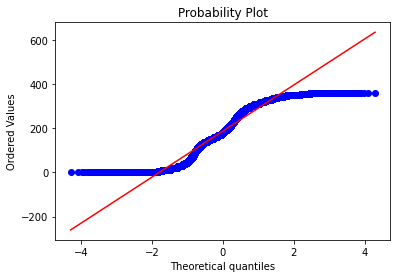

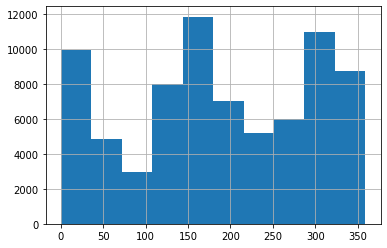

In [ ]:
## Wind Bearing (degrees). - X_train
stats.probplot(X_train["Wind Bearing (degrees)"], dist="norm", plot=plt)
plt.show();
X_train["Wind Bearing (degrees)"].hist();

This is quite normalized graph. So no need of transformations.

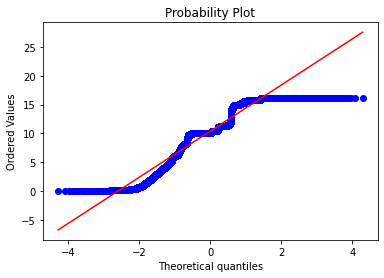

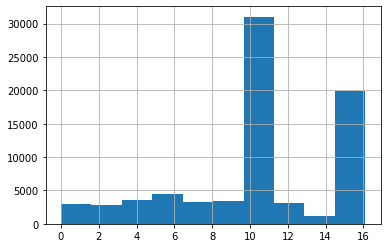

In [ ]:
## Visibility (km). - X_train
stats.probplot(X_train["Visibility (km)"], dist="norm", plot=plt);
plt.show();
X_train["Visibility (km)"].hist();

It is quite left skewed. So I'll do Exponential trnasformation

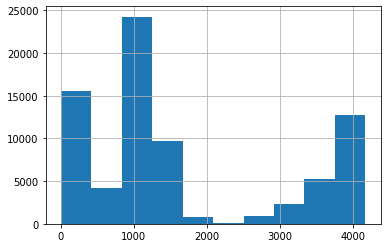

In [ ]:
# create columns variables to hold the columns that need transformation
columns = ['Visibility (km)']

# create the function transformer object with exponentioal transformation
exp_transformer = FunctionTransformer(lambda x:x**3, validate=True)

# apply the transformation 
data_new = exp_transformer.transform(X_train[columns])
df_new = pd.DataFrame(data_new, columns=columns)
df_new['Visibility (km)'].hist()

# replace new values with previous data frame
# X_train["Visibility (km)"]=df_new['Visibility (km)']

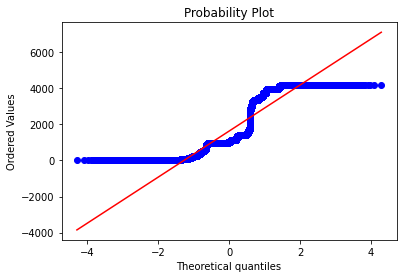

In [ ]:
stats.probplot(df_new["Visibility (km)"], dist="norm", plot=plt);

It seems to me, this has been over transformed. So I keep the original as it is. (This was not I actually expected graph to be)

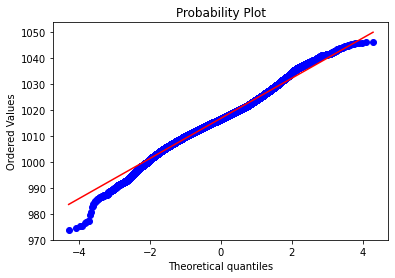

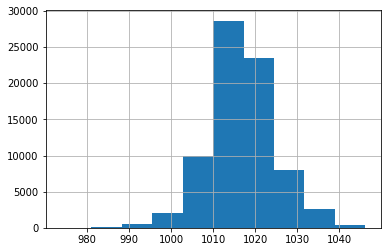

In [ ]:
## Pressure (millibars). - X_train
stats.probplot(X_train["Pressure (millibars)"], dist="norm", plot=plt)
plt.show()
X_train["Pressure (millibars)"].hist()

This is normalized. No need to transformation

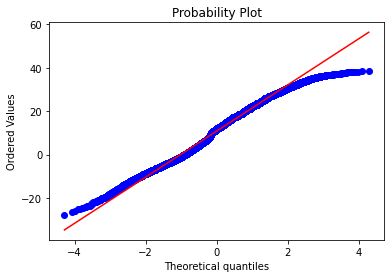

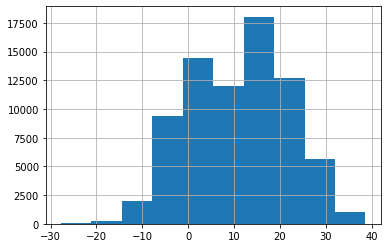

In [ ]:
## Apparent Temperature (C). -y_train
stats.probplot(y_train["Apparent Temperature (C)"], dist="norm", plot=plt);
plt.show();
y_train["Apparent Temperature (C)"].hist();

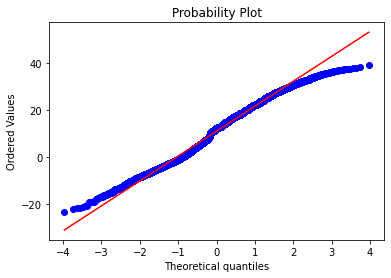

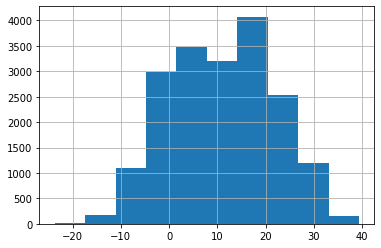

In [ ]:
## Apparent Temperature (C). -y_test
stats.probplot(y_test["Apparent Temperature (C)"], dist="norm", plot=plt);
plt.show();
y_test["Apparent Temperature (C)"].hist();

Already Normalized. No need any trasformation

Final histograms will shown below

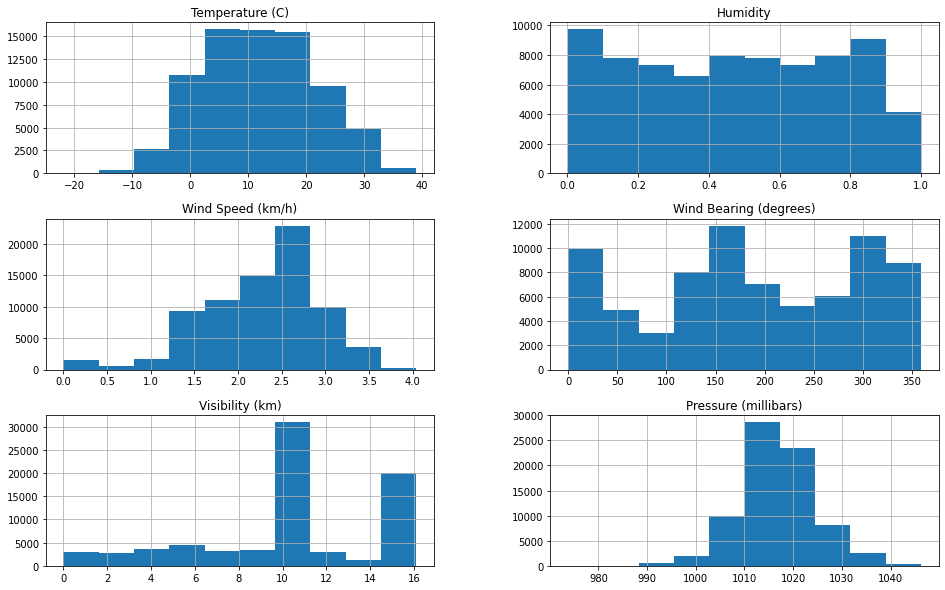

In [ ]:
X_train.hist(figsize=(16,10));

### III). If it is required, apply suitable feature coding techniques.

We applied data coding for categorical data. Here we can find  categorical data coloumns -> Summary and Percip Type

In [ ]:
X_train

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,19.105556,0.636056,1.987203,84.0,9.9820,1014.38
1,Overcast,rain,12.150000,0.405224,2.505844,348.0,11.2700,1019.79
2,Mostly Cloudy,rain,18.827778,0.729000,2.055443,204.0,9.9820,1014.59
3,Overcast,snow,-0.022222,0.551368,2.190234,11.0,11.2700,1016.34
4,Clear,rain,26.111111,0.103823,2.929058,330.0,9.9820,1015.70
...,...,...,...,...,...,...,...,...
75639,Overcast,rain,2.644444,0.205379,3.198918,179.0,10.0464,1010.52
75640,Overcast,rain,16.066667,0.804357,2.299350,350.0,4.2987,1009.30
75641,Mostly Cloudy,rain,18.883333,0.103823,3.224218,233.0,10.3523,1012.90
75642,Partly Cloudy,rain,12.416667,0.830584,1.911585,256.0,9.7888,1020.70


Perform One Hot Encoding to Summary column.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# We fitting only training data
enc.fit(X_train[['Summary']])

colnames = enc.get_feature_names()
enc_df = pd.DataFrame(enc.transform(X_train[['Summary']]).toarray(),columns=colnames)

# transforming testing data
enc_df_test = pd.DataFrame(enc.transform(X_test[['Summary']]).toarray(),columns=colnames)

X_train = X_train.join(enc_df)
X_test = X_test.join(enc_df_test)


In [ ]:
X_train

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,Partly Cloudy,rain,19.105556,0.636056,1.987203,84.0,9.9820,1014.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Overcast,rain,12.150000,0.405224,2.505844,348.0,11.2700,1019.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mostly Cloudy,rain,18.827778,0.729000,2.055443,204.0,9.9820,1014.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Overcast,snow,-0.022222,0.551368,2.190234,11.0,11.2700,1016.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Clear,rain,26.111111,0.103823,2.929058,330.0,9.9820,1015.70,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75639,Overcast,rain,2.644444,0.205379,3.198918,179.0,10.0464,1010.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75640,Overcast,rain,16.066667,0.804357,2.299350,350.0,4.2987,1009.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75641,Mostly Cloudy,rain,18.883333,0.103823,3.224218,233.0,10.3523,1012.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75642,Partly Cloudy,rain,12.416667,0.830584,1.911585,256.0,9.7888,1020.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,Mostly Cloudy,rain,22.761111,0.132651,3.060316,310.0,11.2056,1017.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Clear,rain,22.294444,0.314432,1.432176,49.0,9.9820,1018.39,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mostly Cloudy,rain,20.000000,0.592704,1.763017,240.0,9.9820,1008.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Overcast,rain,12.733333,0.474552,2.192033,147.0,10.0464,1022.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Partly Cloudy,rain,9.861111,0.778688,1.384943,13.0,15.8263,1018.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18907,Clear,rain,19.100000,0.328509,2.464262,100.0,15.8263,1020.41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18908,Partly Cloudy,rain,16.255556,0.658503,1.400937,159.0,14.9086,1009.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18909,Clear,rain,9.033333,0.830584,1.420575,267.0,6.2951,1012.70,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18910,Overcast,rain,6.111111,0.804357,2.507157,30.0,12.0750,1013.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see our dataset encoded properly. Now we can apply encoding for Precip type

Doing the Label encoding to Precip Type

In [ ]:
X_train['Precip Type']=X_train['Precip Type'].astype('category')
X_train['Precip Type']=X_train['Precip Type'].cat.codes
X_train.dtypes
X_train

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,Partly Cloudy,0,19.105556,0.636056,1.987203,84.0,9.9820,1014.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Overcast,0,12.150000,0.405224,2.505844,348.0,11.2700,1019.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mostly Cloudy,0,18.827778,0.729000,2.055443,204.0,9.9820,1014.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Overcast,1,-0.022222,0.551368,2.190234,11.0,11.2700,1016.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Clear,0,26.111111,0.103823,2.929058,330.0,9.9820,1015.70,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75639,Overcast,0,2.644444,0.205379,3.198918,179.0,10.0464,1010.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75640,Overcast,0,16.066667,0.804357,2.299350,350.0,4.2987,1009.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75641,Mostly Cloudy,0,18.883333,0.103823,3.224218,233.0,10.3523,1012.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75642,Partly Cloudy,0,12.416667,0.830584,1.911585,256.0,9.7888,1020.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test['Precip Type']=X_test['Precip Type'].astype('category')
X_test['Precip Type']=X_test['Precip Type'].cat.codes
X_test.dtypes
X_test

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,Mostly Cloudy,0,22.761111,0.132651,3.060316,310.0,11.2056,1017.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Clear,0,22.294444,0.314432,1.432176,49.0,9.9820,1018.39,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mostly Cloudy,0,20.000000,0.592704,1.763017,240.0,9.9820,1008.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Overcast,0,12.733333,0.474552,2.192033,147.0,10.0464,1022.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Partly Cloudy,0,9.861111,0.778688,1.384943,13.0,15.8263,1018.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18907,Clear,0,19.100000,0.328509,2.464262,100.0,15.8263,1020.41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18908,Partly Cloudy,0,16.255556,0.658503,1.400937,159.0,14.9086,1009.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18909,Clear,0,9.033333,0.830584,1.420575,267.0,6.2951,1012.70,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18910,Overcast,0,6.111111,0.804357,2.507157,30.0,12.0750,1013.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we can drop the categorical Summary column and final datafram will be as folows

In [ ]:
# Summary is encoded and joined. So remove that also
X_train.drop('Summary', inplace=True, axis=1)

#Final training Dataframe
X_train

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,0,19.105556,0.636056,1.987203,84.0,9.9820,1014.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,12.150000,0.405224,2.505844,348.0,11.2700,1019.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,18.827778,0.729000,2.055443,204.0,9.9820,1014.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,-0.022222,0.551368,2.190234,11.0,11.2700,1016.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,26.111111,0.103823,2.929058,330.0,9.9820,1015.70,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75639,0,2.644444,0.205379,3.198918,179.0,10.0464,1010.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75640,0,16.066667,0.804357,2.299350,350.0,4.2987,1009.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75641,0,18.883333,0.103823,3.224218,233.0,10.3523,1012.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75642,0,12.416667,0.830584,1.911585,256.0,9.7888,1020.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Summary is encoded and joined. So remove that also
X_test.drop('Summary', inplace=True, axis=1)

#Final testing Dataframe
X_test

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,0,22.761111,0.132651,3.060316,310.0,11.2056,1017.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,22.294444,0.314432,1.432176,49.0,9.9820,1018.39,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,20.000000,0.592704,1.763017,240.0,9.9820,1008.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,12.733333,0.474552,2.192033,147.0,10.0464,1022.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,9.861111,0.778688,1.384943,13.0,15.8263,1018.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18907,0,19.100000,0.328509,2.464262,100.0,15.8263,1020.41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18908,0,16.255556,0.658503,1.400937,159.0,14.9086,1009.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18909,0,9.033333,0.830584,1.420575,267.0,6.2951,1012.70,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18910,0,6.111111,0.804357,2.507157,30.0,12.0750,1013.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### IV). Scale and/or standardized the features, produce relevant graphs to show the scaling/ standardizing effect.

We should keep aside categerical features that have encoded previously before do the standardization 

In [ ]:
X_train.describe().loc[['min','max']]

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
min,0.0,-21.822222,0.001728,0.000000,0.0,0.0,973.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,38.983333,1.000000,4.041847,359.0,16.1,1046.26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


You can see a large varience in wind bearing. So we can descretize it. So I'm keeping aside that as well

In [ ]:
to_standardize_train = X_train[['Temperature (C)', 'Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']].copy()
to_standardize_train

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,19.105556,0.636056,1.987203,9.9820,1014.38
1,12.150000,0.405224,2.505844,11.2700,1019.79
2,18.827778,0.729000,2.055443,9.9820,1014.59
3,-0.022222,0.551368,2.190234,11.2700,1016.34
4,26.111111,0.103823,2.929058,9.9820,1015.70
...,...,...,...,...,...
75639,2.644444,0.205379,3.198918,10.0464,1010.52
75640,16.066667,0.804357,2.299350,4.2987,1009.30
75641,18.883333,0.103823,3.224218,10.3523,1012.90
75642,12.416667,0.830584,1.911585,9.7888,1020.70


In [ ]:
to_standardize_test = X_test[['Temperature (C)', 'Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']].copy()
to_standardize_test

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,22.761111,0.132651,3.060316,11.2056,1017.02
1,22.294444,0.314432,1.432176,9.9820,1018.39
2,20.000000,0.592704,1.763017,9.9820,1008.50
3,12.733333,0.474552,2.192033,10.0464,1022.21
4,9.861111,0.778688,1.384943,15.8263,1018.64
...,...,...,...,...,...
18907,19.100000,0.328509,2.464262,15.8263,1020.41
18908,16.255556,0.658503,1.400937,14.9086,1009.47
18909,9.033333,0.830584,1.420575,6.2951,1012.70
18910,6.111111,0.804357,2.507157,12.0750,1013.30


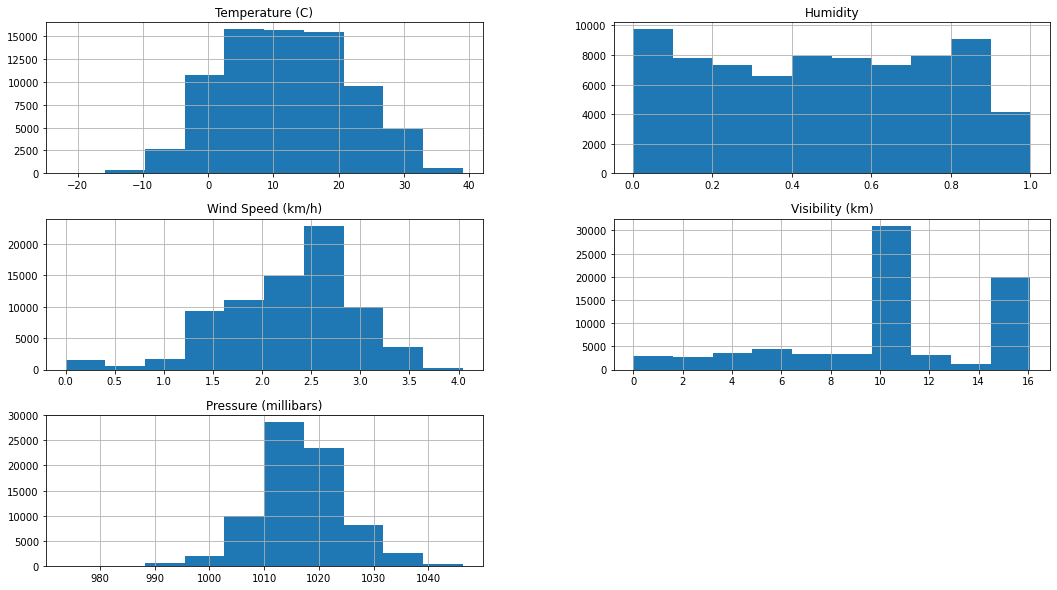

In [ ]:
to_standardize_train.hist(figsize=(18,10));

As you can see in above histograms, x axises have different range and not in normalized range.

Apply Standard Standardization

In [ ]:
# create the scaler object
scaler = StandardScaler()

# Same as previous -  we only fit the training data to scaler
scaler.fit(to_standardize_train)

train_scaled = scaler.transform(to_standardize_train)
test_scaled = scaler.transform(to_standardize_test)

standardized_df_train = pd.DataFrame(train_scaled, columns = to_standardize_train.columns)
standardized_df_test = pd.DataFrame(test_scaled, columns = to_standardize_test.columns)

standardized_df_train

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,0.749828,0.557536,-0.437494,-0.100184,-0.310853
1,0.021704,-0.250878,0.344251,0.209020,0.384140
2,0.720750,0.883042,-0.334635,-0.100184,-0.283875
3,-1.252513,0.260944,-0.131467,0.209020,-0.059062
4,1.483186,-1.306437,0.982159,-0.100184,-0.141280
...,...,...,...,...,...
75639,-0.973360,-0.950770,1.388917,-0.084724,-0.806726
75640,0.431710,1.146956,0.033004,-1.464547,-0.963453
75641,0.726565,-1.306437,1.427051,-0.011288,-0.500980
75642,0.049619,1.238807,-0.551472,-0.146565,0.501043


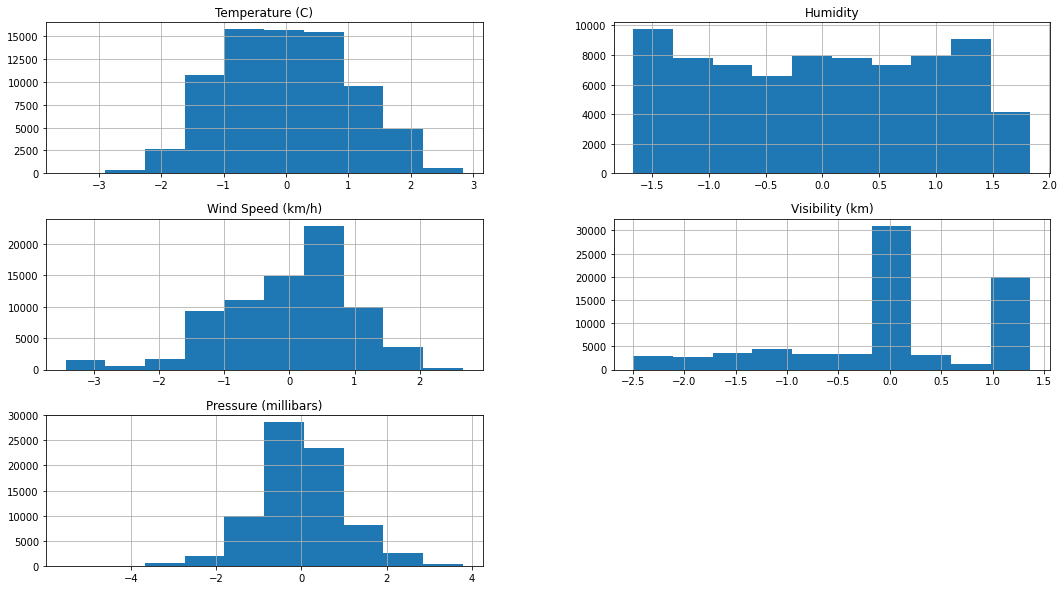

In [ ]:
standardized_df_train.hist(figsize=(18,10));

As you can see in the X axises, They are well standardized.

Let's look about testing set

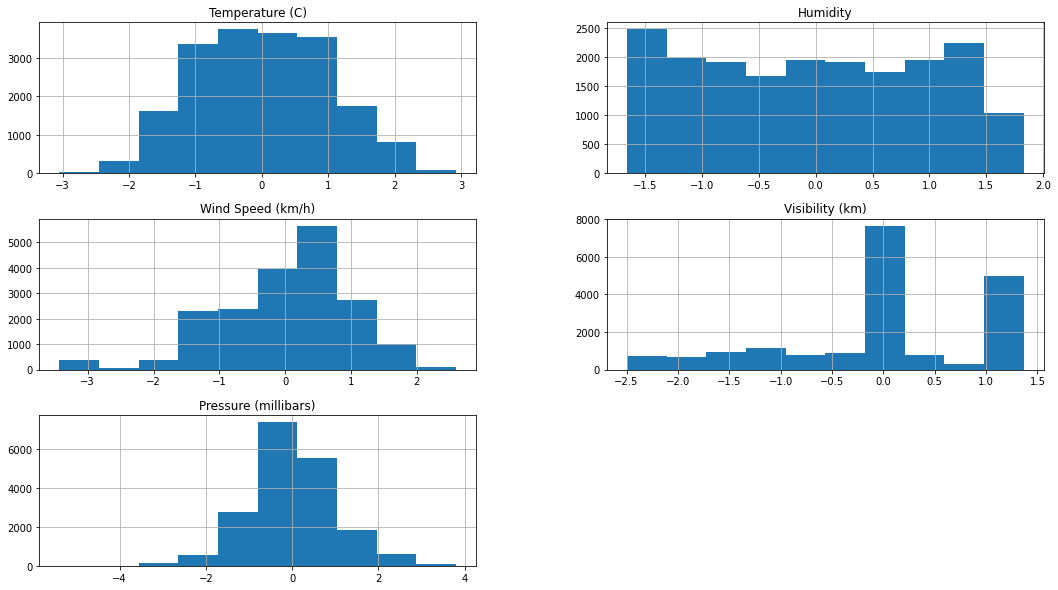

In [ ]:
standardized_df_test.hist(figsize=(18,10));

It's also in very good scaler. Now we should apply to our target variable

In [ ]:
# create the scaler object
scaler2 = StandardScaler()

# Same as previous -  we only fit the training data to scaler
scaler2.fit(y_train)

target_train_scaled = scaler2.transform(y_train)
target_test_scaled = scaler2.transform(y_test)

standardized_target_df_train = pd.DataFrame(target_train_scaled, columns = y_train.columns)
standardized_target_df_test = pd.DataFrame(target_test_scaled, columns = y_test.columns)

standardized_target_df_train

,Apparent Temperature (C)
0,0.770187
1,0.119869
2,0.744216
3,-1.271146
4,1.425179
...,...
75639,-1.233228
75640,0.486062
75641,0.749410
75642,0.144801


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efcd68f5c50>]],
      dtype=object)

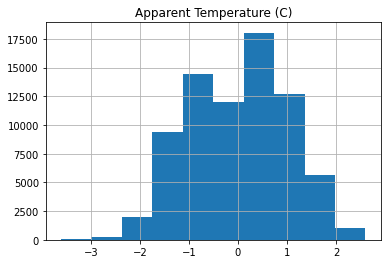

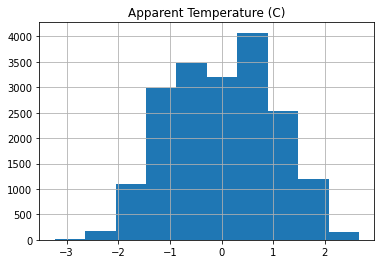

In [ ]:
standardized_target_df_train.hist()
standardized_target_df_test.hist()

Both are now in standardized manner

Now we should replace the old one with new standradized values

In [ ]:
X_train.drop(columns=to_standardize_train.columns,inplace=True, axis=1)
X_test.drop(columns=to_standardize_test.columns,inplace=True, axis=1)

X_train = standardized_df_train.join(X_train)
X_test = standardized_df_test.join(X_test)

y_train = standardized_target_df_train;
y_test = standardized_target_df_test;

In [ ]:
X_train

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Precip Type,Wind Bearing (degrees),x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,0.749828,0.557536,-0.437494,-0.100184,-0.310853,0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.021704,-0.250878,0.344251,0.209020,0.384140,0,348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.720750,0.883042,-0.334635,-0.100184,-0.283875,0,204.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.252513,0.260944,-0.131467,0.209020,-0.059062,1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.483186,-1.306437,0.982159,-0.100184,-0.141280,0,330.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75639,-0.973360,-0.950770,1.388917,-0.084724,-0.806726,0,179.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75640,0.431710,1.146956,0.033004,-1.464547,-0.963453,0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75641,0.726565,-1.306437,1.427051,-0.011288,-0.500980,0,233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75642,0.049619,1.238807,-0.551472,-0.146565,0.501043,0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### V). If necessary, apply feature discretization, and produce a relevant graph to show the discretization

Feature Discretization means transforming continues variables into descrete once

Here we have a feature called Wind Bearing (degrees). It provides 0-360 degrees coverage about the wind direction. We can discretize this into eight bins representing
0.   North
1.   NorthEast
2.   East
3.   SouthEast
4.   South
5.   SouthWest
6.   West
7.   NorthWest



Apply K-means discretization

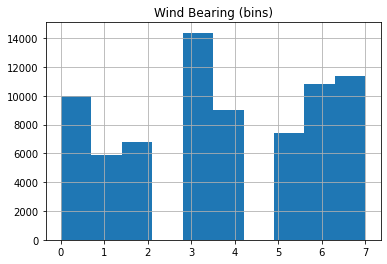

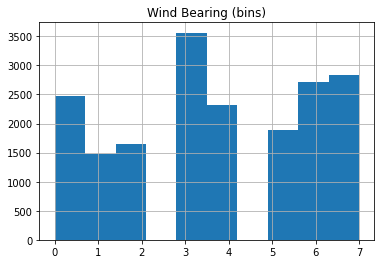

In [ ]:
train_data_disc = pd.DataFrame(X_train, columns=['Wind Bearing (degrees)'])
test_data_disc = pd.DataFrame(X_test, columns=['Wind Bearing (degrees)'])

# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 
discretizer.fit(train_data_disc)


train_discretized = discretizer.transform(train_data_disc)
test_discretized = discretizer.transform(test_data_disc)

train_discretized_df = pd.DataFrame(train_discretized,columns=['Wind Bearing (bins)'])
test_discretized_df = pd.DataFrame(test_discretized,columns=['Wind Bearing (bins)'])

train_discretized_df.hist();
test_discretized_df.hist();

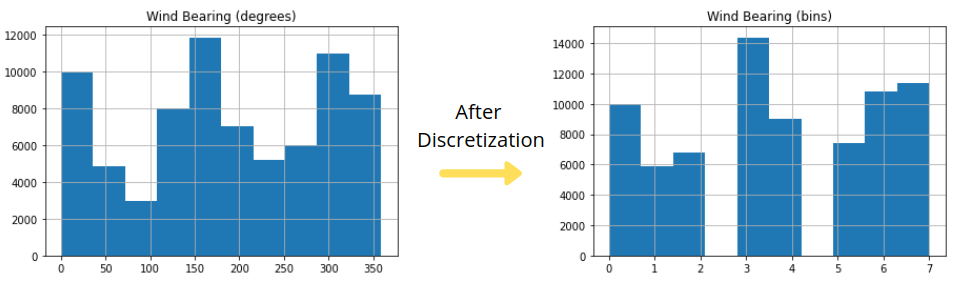

In [ ]:
# Append these into previous datframes
X_train.drop(columns=['Wind Bearing (degrees)'],inplace=True, axis=1)
X_train = train_discretized_df.join(X_train)

X_test.drop(columns=['Wind Bearing (degrees)'],inplace=True, axis=1)
X_test = test_discretized_df.join(X_test)

X_train

,Wind Bearing (bins),Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Precip Type,x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,1.0,0.749828,0.557536,-0.437494,-0.100184,-0.310853,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,0.021704,-0.250878,0.344251,0.209020,0.384140,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.720750,0.883042,-0.334635,-0.100184,-0.283875,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-1.252513,0.260944,-0.131467,0.209020,-0.059062,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,1.483186,-1.306437,0.982159,-0.100184,-0.141280,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75639,4.0,-0.973360,-0.950770,1.388917,-0.084724,-0.806726,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75640,7.0,0.431710,1.146956,0.033004,-1.464547,-0.963453,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75641,5.0,0.726565,-1.306437,1.427051,-0.011288,-0.500980,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75642,5.0,0.049619,1.238807,-0.551472,-0.146565,0.501043,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# (b). **Perform Feature Engineering by executing the following task:** 

### I). Appropriately use PCA (Principal Component Analysis) or SVD (Singular Value Decomposition) for feature reduction.

In [ ]:
# Removing encoded features
# new_X_train=  X_train[['Temperature (C)', 'Humidity','Wind Speed (km/h)','Wind Bearing (bins)','Visibility (km)','Pressure (millibars)']].copy()
# new_X_train

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA()
pca.fit(X_train) 

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca_df = pd.DataFrame(data = X_train_pca,columns=X_train.columns)
X_test_pca_df = pd.DataFrame(data = X_test_pca,columns=X_test.columns)

In [ ]:
X_train_pca_df.head()

,Wind Bearing (bins),Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Precip Type,x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,2.694023,-0.309668,-0.014464,0.882702,0.215275,-0.715420,-0.446565,-0.400720,-0.058181,0.024785,0.163189,0.013815,0.004014,0.006864,-0.001040,0.001051,-0.002720,-0.001469,0.001330,0.000542,0.001183,-0.001290,0.000704,0.000501,-0.000566,0.000087,-0.000420,-0.000335,-0.000128,0.000077,0.000007,0.000059,-1.153244e-16
1,-3.290600,0.062807,-0.205934,-0.493488,-0.033869,-0.083492,-0.098102,0.896594,-0.427411,-0.048291,-0.118515,-0.019620,-0.005225,-0.010129,-0.002829,-0.001337,0.001941,0.000976,-0.000283,-0.000032,-0.000243,0.001600,-0.001591,-0.000440,-0.000022,-0.000262,0.000199,0.000093,0.000051,-0.000084,-0.000008,-0.000025,-4.891703e-17
2,-0.296961,0.135573,0.090235,0.920018,0.044241,0.591831,-0.897719,-0.300763,-0.117613,0.101774,0.144174,0.016004,0.002745,0.004300,-0.002045,0.000272,-0.002255,-0.001168,0.001529,0.000762,0.001378,-0.000826,-0.000016,0.000428,-0.000772,0.000028,-0.000431,-0.000353,-0.000125,0.000059,0.000001,0.000053,2.047191e-17
3,3.733101,0.675653,0.526329,-0.298438,-0.925510,-0.100650,0.694792,0.679614,-0.338345,0.644057,0.140555,-0.000992,0.001435,0.004445,0.000267,-0.001184,0.000077,-0.001248,0.000306,0.000408,-0.000611,-0.002019,0.000533,-0.000075,0.000072,0.000023,0.000468,-0.000052,0.000157,0.000016,0.000012,0.000010,-6.279482e-17
4,-3.391626,-1.504225,-0.033741,-0.467085,1.183016,0.128625,-0.270977,0.660053,0.921928,0.010197,0.190485,-0.055376,-0.006221,-0.013967,-0.007920,0.000224,0.001641,-0.000595,-0.000564,0.000323,-0.001588,-0.000201,-0.001445,-0.000145,0.000007,-0.000371,0.000174,0.000064,-0.000207,-0.000085,-0.000008,0.000043,-1.183060e-16


In [ ]:
X_test_pca_df.head()

,Wind Bearing (bins),Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Precip Type,x0_Breezy,x0_Breezy and Dry,x0_Breezy and Foggy,x0_Breezy and Mostly Cloudy,x0_Breezy and Overcast,x0_Breezy and Partly Cloudy,x0_Clear,x0_Drizzle,x0_Dry,x0_Dry and Mostly Cloudy,x0_Dry and Partly Cloudy,x0_Foggy,x0_Humid and Mostly Cloudy,x0_Humid and Overcast,x0_Humid and Partly Cloudy,x0_Light Rain,x0_Mostly Cloudy,x0_Overcast,x0_Partly Cloudy,x0_Rain,x0_Windy,x0_Windy and Dry,x0_Windy and Foggy,x0_Windy and Mostly Cloudy,x0_Windy and Overcast,x0_Windy and Partly Cloudy
0,-2.413207,-1.496378,0.187115,-0.804287,0.755061,0.782375,-0.390456,-0.051507,-0.074364,0.101009,0.003878,-0.029119,-0.005585,-0.010605,-0.004516,-0.000784,0.001695,0.000058,-0.000351,0.000314,-0.001014,0.000256,-0.001458,-0.000273,0.000026,-0.000289,2.799210e-04,0.000030,-0.000104,-0.000088,-0.000004,0.000029,7.598306e-17
1,2.765415,-0.686040,-1.148472,0.820021,0.591778,0.236316,-0.072109,0.606462,0.775717,-0.074799,0.195463,0.003318,-0.002120,-0.001077,-0.004908,-0.001572,-0.001489,-0.000726,0.001357,0.000390,0.000863,-0.000386,-0.001141,0.000463,-0.000509,-0.000531,-2.433175e-04,-0.000178,-0.000018,0.000023,-0.000002,0.000064,-1.738171e-16
2,-1.308620,-0.249026,0.108506,1.563888,0.179099,0.745896,-0.254355,-0.225302,-0.095478,0.091389,0.115122,0.014471,0.002101,0.004552,-0.002327,-0.000519,-0.001864,-0.000895,0.001170,0.000549,0.001096,-0.000446,-0.000276,0.000545,-0.000666,-0.000118,-3.675340e-04,-0.000193,-0.000029,0.000074,-0.000004,0.000031,-6.279482e-17
3,0.748826,0.231918,-0.370174,-0.304952,0.099468,-0.088375,-0.287630,0.862486,-0.474722,-0.060052,-0.059143,0.001562,-0.003856,-0.005455,-0.002543,-0.001637,0.000261,0.000459,0.000697,0.000156,0.000615,0.000832,-0.001385,-0.000122,-0.000245,-0.000354,-3.165542e-07,-0.000090,0.000029,-0.000047,-0.000002,0.000020,-6.279482e-17
4,3.758222,0.101195,-0.894053,0.911375,-1.550281,-0.742767,-0.309741,-0.458046,-0.132655,-0.031982,-0.067728,0.025033,0.005957,0.010697,0.003655,0.000291,-0.002077,-0.000495,0.001198,0.000319,0.002129,0.000545,0.000938,0.000013,-0.000561,0.000343,-1.601639e-04,-0.000335,0.000148,0.000074,0.000015,-0.000018,-5.981326e-17


In [ ]:
# Lambda values (Eigon values)
explained_variance_ratio=pca.explained_variance_ratio_
explained_variance_ratio

array([4.77831747e-01, 1.95883361e-01, 9.89552318e-02, 7.96406197e-02,
       5.75671497e-02, 2.66585467e-02, 2.50359804e-02, 1.60006892e-02,
       1.05362498e-02, 5.40960201e-03, 4.31103731e-03, 7.02756071e-04,
       4.97881914e-04, 3.87232697e-04, 1.13082074e-04, 7.37972929e-05,
       6.26210252e-05, 5.16643530e-05, 4.26366969e-05, 4.02863923e-05,
       3.86676835e-05, 3.70535049e-05, 3.48253853e-05, 2.92230130e-05,
       1.74207569e-05, 1.36057213e-05, 1.10464726e-05, 8.57705653e-06,
       3.70601613e-06, 1.33072643e-06, 1.18563755e-06, 1.18547575e-06,
       4.74112242e-33])

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

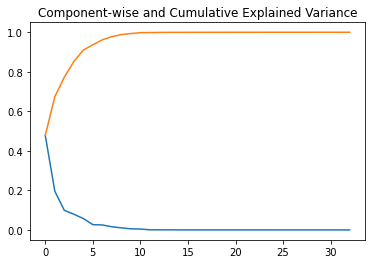

In [ ]:
plt.plot(range(33), pca.explained_variance_ratio_)
plt.plot(range(33), np.cumsum(pca.explained_variance_ratio_)) # Cummualtive frequency graph
plt.title("Component-wise and Cumulative Explained Variance")

In [ ]:
arr=explained_variance_ratio 
sum = 0;  
for i in range(0, 10):    
   sum=sum+arr[i]   
print("Sum :" + str(sum));    

Sum :0.9935191767228576


From the above output, you can observe that we can reduce (project) 33 diamentions into 10 diamentions with a loss only 1% of information.

**Note: I have experiment this for several times in order to find the n_componts that gives the accuracy than the normal model. So I use that as the final n_componets.**

Now we have known the n_components. Let's apply PCA to reduce the features

In [ ]:
pca = PCA(n_components=10)
pca.fit(X_train) 

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train.shape

(75644, 33)

In [ ]:
X_train_pca.shape

(75644, 10)

The critical point here is that the 7 columns(components) are actually 7 new columns, determined by the algorithm behind sklearn.decomposition’s PCA module. Because PCA not entirely drop the columns, but project the data into eigon vecter space diamentions and removing the non signinficant overlapping diamentions.

### II). Identify significant and independent features using appropriate techniques.  

Correlation Matrix with heat map

Features only

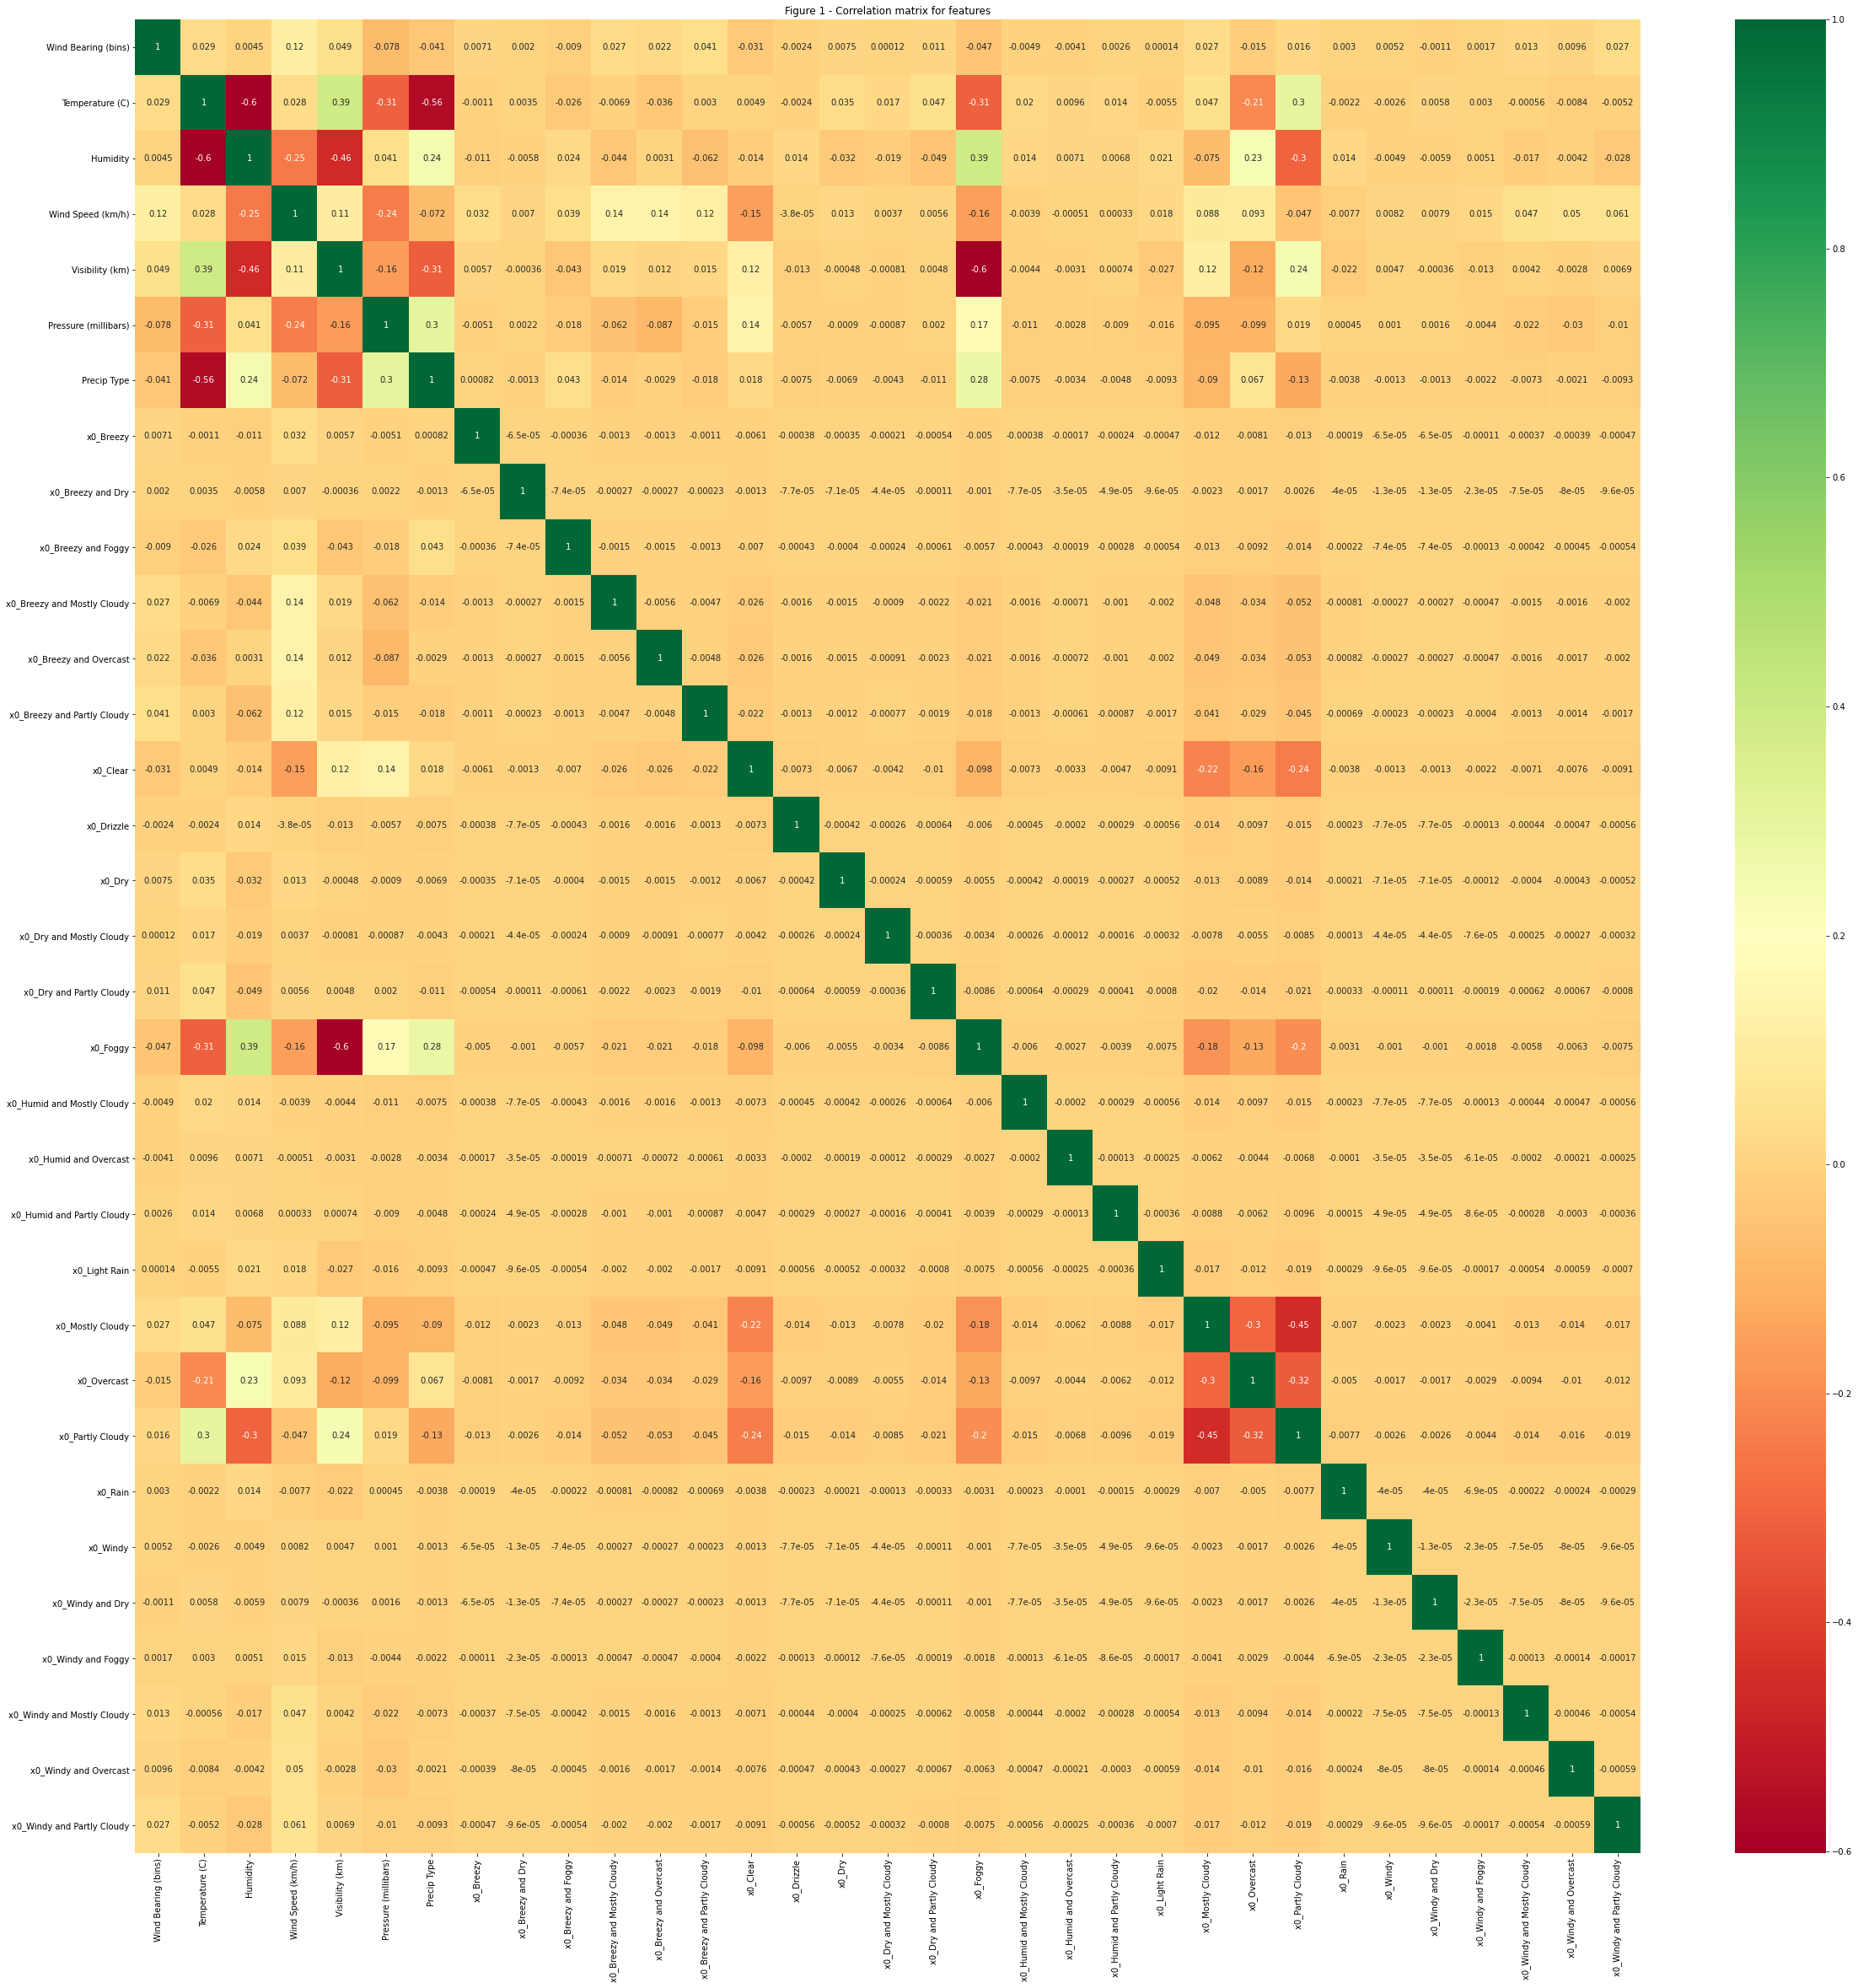

In [ ]:
correlation_mat = X_train.iloc[:,:33].corr()
plt.figure(figsize=(40,40))
sns.heatmap(correlation_mat, annot = True, cmap="RdYlGn")
plt.title("Figure 1 - Correlation matrix for features")
plt.show()

High Corelated features


1.   Humidity vs Temparature
2. temperature and visibility
3. humidity and visibility
4. foggy and visibility
5. precip type and temparature



**Use case:Is there a relationship between humidity and temperature** - Yes High negative corelation

In [ ]:
df_combined = X_train.join(y_train)

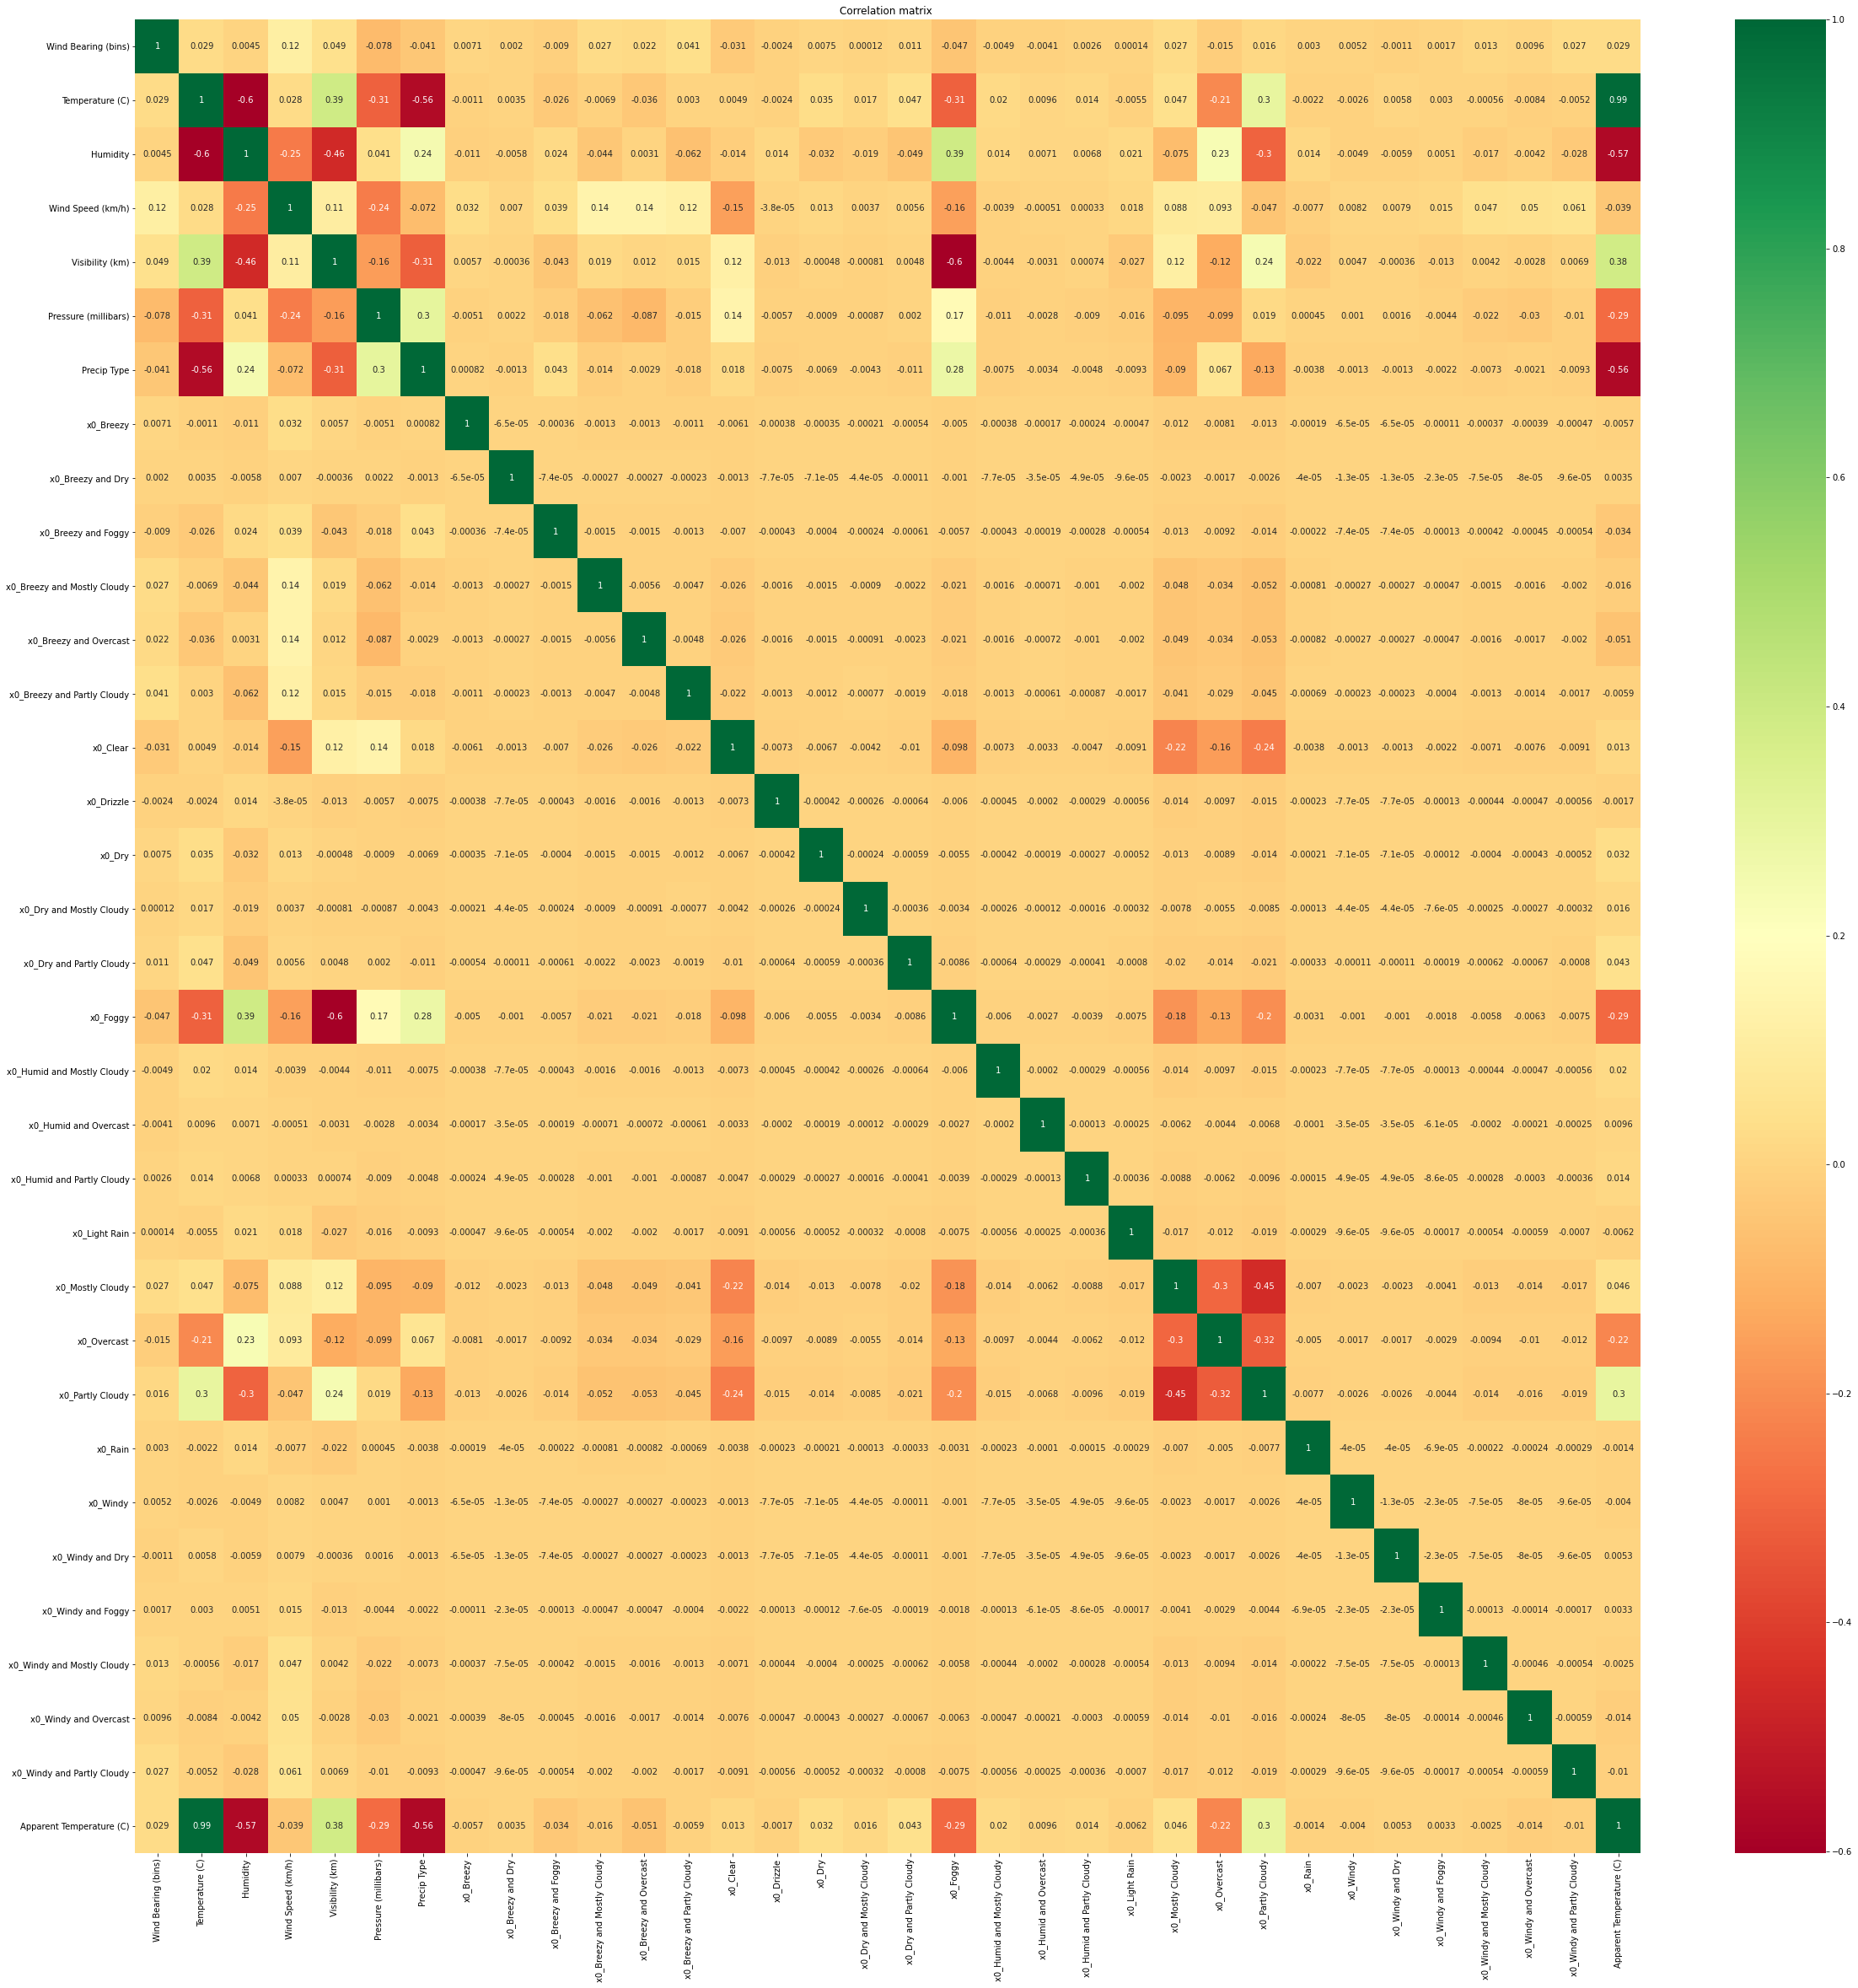

In [ ]:
correlation_mat = df_combined.iloc[:,:34].corr()
plt.figure(figsize=(40,40))
sns.heatmap(correlation_mat, annot = True, cmap="RdYlGn")
plt.title("Correlation matrix ")
plt.show()

Look at the last column. Apperent Temparature is the highly correlated with  Temparature  followed by Humidity,Percip type Visibility...

So we can find a inverse propotional relationship between humidity and apparent temperature. **(Use case Q2 answer)**

# (c). **Modeling:**

**(Training Dataset to Test Dataset is 0.8 to 0.2 ratio) Linear Regression Model**

We already splitted the dataset

Wthiout PCA - All 33 features

In [ ]:
#Implementing Linear Regression
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [ ]:
predictions = lm.predict(X_test)
y_hat = pd.DataFrame(predictions, columns=["predicted"])
print(y_hat.head(10)) #print predictions for first ten values

   predicted
0   1.062881
1   1.143303
2   0.899168
3   0.100289
4  -0.128300
5   1.201320
6   0.322973
7  -1.153633
8  -1.394791
9  -0.346294


In [ ]:
 #Calcualting MSE of y_hat and y
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_hat)
mse

0.009716231890864834

In [ ]:
#Root Mean Sqaured Error
from math import sqrt
rmsq = sqrt(mean_squared_error(y_test, y_hat))
rmsq

0.09857094851356983

In [ ]:
#Percentage of explained variance of the predictions
score = lm.score(X_test,y_test)
score

0.9902856936019104

In [ ]:
#W parameters of the model
print(lm.coef_)

[[ 0.00322298  0.99759523  0.01189734 -0.0620281   0.0024121   0.0108694
  -0.04655186 -0.10934736  0.1514985  -0.22569014  0.03947193 -0.04391954
   0.01171968  0.02053634  0.05513293 -0.0792297  -0.05559578 -0.07119704
   0.04917332  0.01520845  0.01471725  0.0202074   0.036521    0.03626594
   0.02854825  0.02308331  0.03703726 -0.20862974  0.0270353   0.21790801
   0.08619272 -0.05442235 -0.02222592]]


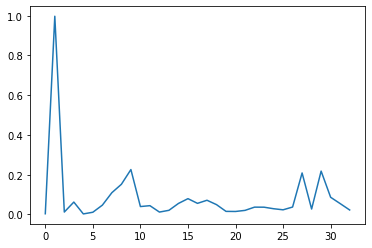

In [ ]:
abs_coef=abs(lm.coef_)
plt.plot(abs_coef[0])

In [ ]:
lm.coef_[0].max()

0.997595225304442

Our weights values are very small values. So we can say our model is well genaralized.

In [ ]:
#Intercept of the model
print(lm.intercept_)

[-0.03573854]


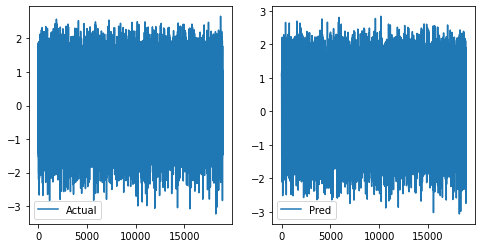

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(y_test, label = "Actual")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_hat, label = "Pred")
plt.legend()

# Display a figure.
plt.show()

As you can see, the x range is quite big so it's not clear very much.

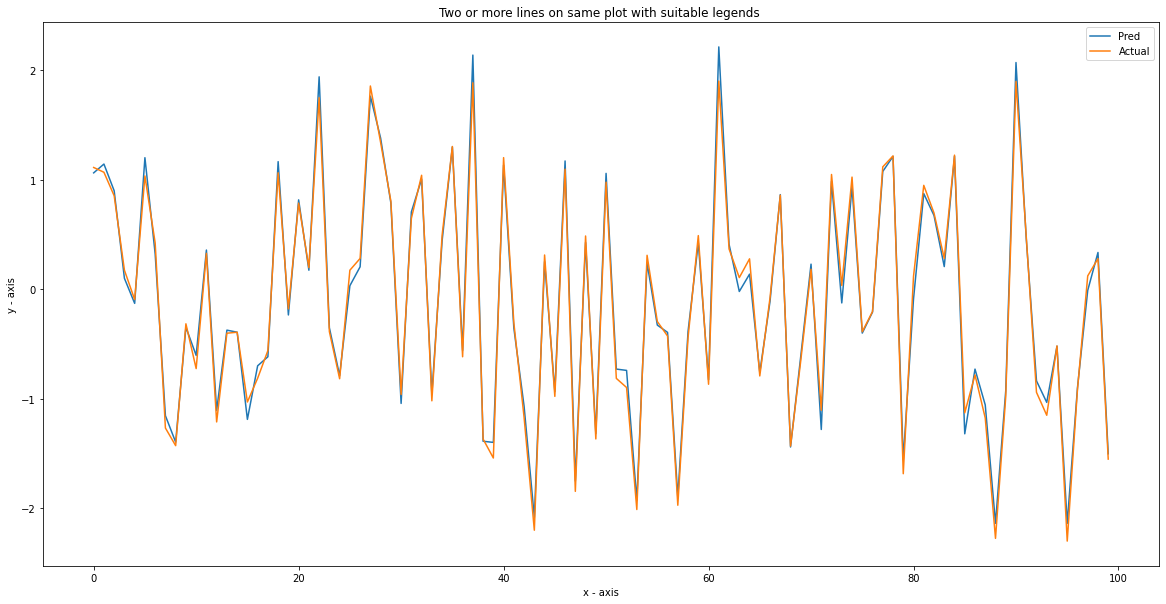

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

# Limiting the data set to 100 rows for more clearence
plt.plot(y_hat[:100], label = "Pred")
plt.plot(y_test[:100], label = "Actual")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Two or more lines on same plot with suitable legends ')
plt.legend()

plt.show()

Now Lets apply With PCA - 7 Diamentions

In [ ]:
#Implementing Linear Regression
from sklearn import linear_model
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X_train_pca,y_train)

In [ ]:
predictions = lm2.predict(X_test_pca)
y_hat_pca = pd.DataFrame(predictions, columns=["predicted"])
print(y_hat_pca.head(10)) #print predictions for first ten values

   predicted
0   1.061243
1   1.139950
2   0.897694
3   0.101420
4  -0.125702
5   1.202425
6   0.321142
7  -1.152732
8  -1.395518
9  -0.346953


In [ ]:
 #Calcualting MSE of y_hat and y
from sklearn.metrics import mean_squared_error

mse_for_pca=mean_squared_error(y_test, y_hat_pca)
mse_for_pca

0.009793604070365409

Previous mse

In [ ]:
mse

0.009716231890864834

In [ ]:
#Root Mean Sqaured Error
from math import sqrt
rmsq2 = sqrt(mean_squared_error(y_test, y_hat_pca))
rmsq2

0.09896263977059934

In [ ]:
#Percentage of explained variance of the predictions
score_pca=lm2.score(X_test_pca,y_test)
score_pca

0.9902083367554705

Previous score

In [ ]:
score

0.9902856936019104

In [ ]:
#W parameters of the model
print(lm2.coef_)

[[-0.02315266 -0.52811299 -0.21656059  0.35562591  0.43139094 -0.02958694
  -0.57333439  0.06822599 -0.02193242  0.16933351]]


In [ ]:
#Intercept of the model
print(lm2.intercept_)

[8.34809347e-17]


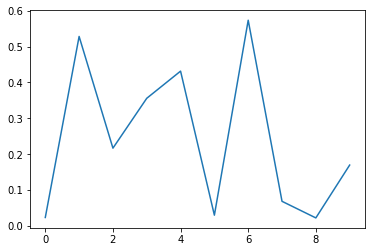

In [ ]:
abs_coef=abs(lm2.coef_)
plt.plot(abs_coef[0])

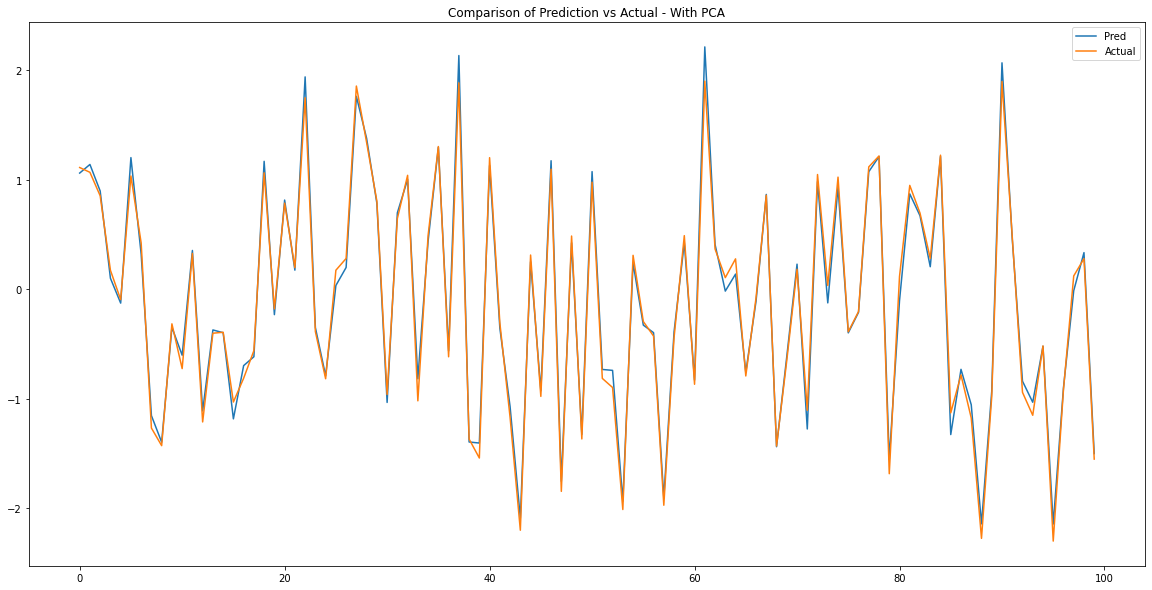

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

# Limiting the data set to 100 rows for more clearence
plt.plot(y_hat_pca[:100], label = "Pred")
plt.plot(y_test[:100], label = "Actual")

plt.title('Comparison of Prediction vs Actual - With PCA')
plt.legend()
plt.show()

In [ ]:
# K-fold cross validation

In [ ]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

Without PCA

In [ ]:
X_combined = np.r_[X_train, X_test]
y_combined = np.r_[y_train, y_test]

In [ ]:
# Perform 6-fold cross validation
scores = cross_val_score(model, X_combined, y_combined, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.99021367 0.99026649 0.99012011 0.99024715 0.99021662 0.99032164]


In [ ]:
predictions = cross_val_predict(model, X_combined, y_combined, cv=6)
accuracy = metrics.r2_score(y_test, y_hat)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.9902856936019104


PCA

In [ ]:
X_combined = np.r_[X_train_pca, X_test_pca]
y_combined = np.r_[y_train, y_test]

In [ ]:
scores = cross_val_score(model2, X_combined, y_combined, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.99009997 0.9901665  0.99005463 0.99019134 0.99014513 0.99023897]


In [ ]:
predictions = cross_val_predict(model2, X_combined, y_combined, cv=6)
accuracy = metrics.r2_score(y_test, y_hat_pca)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.9902083367554705
